In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz 
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics


In [ ]:
DF = pd.read_csv('/content/titanic-passengers.csv',sep=';')

In [ ]:
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(DF)

In [ ]:
#x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
x = data[['Sex', 'Fare', 'Age','Pclass', 'SibSp']]

y= data["Survived"]

In [ ]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tr = tree.DecisionTreeClassifier()  
tr.fit(x_train, y_train)   #fitting our model
y_pred=tr.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.776536312849162


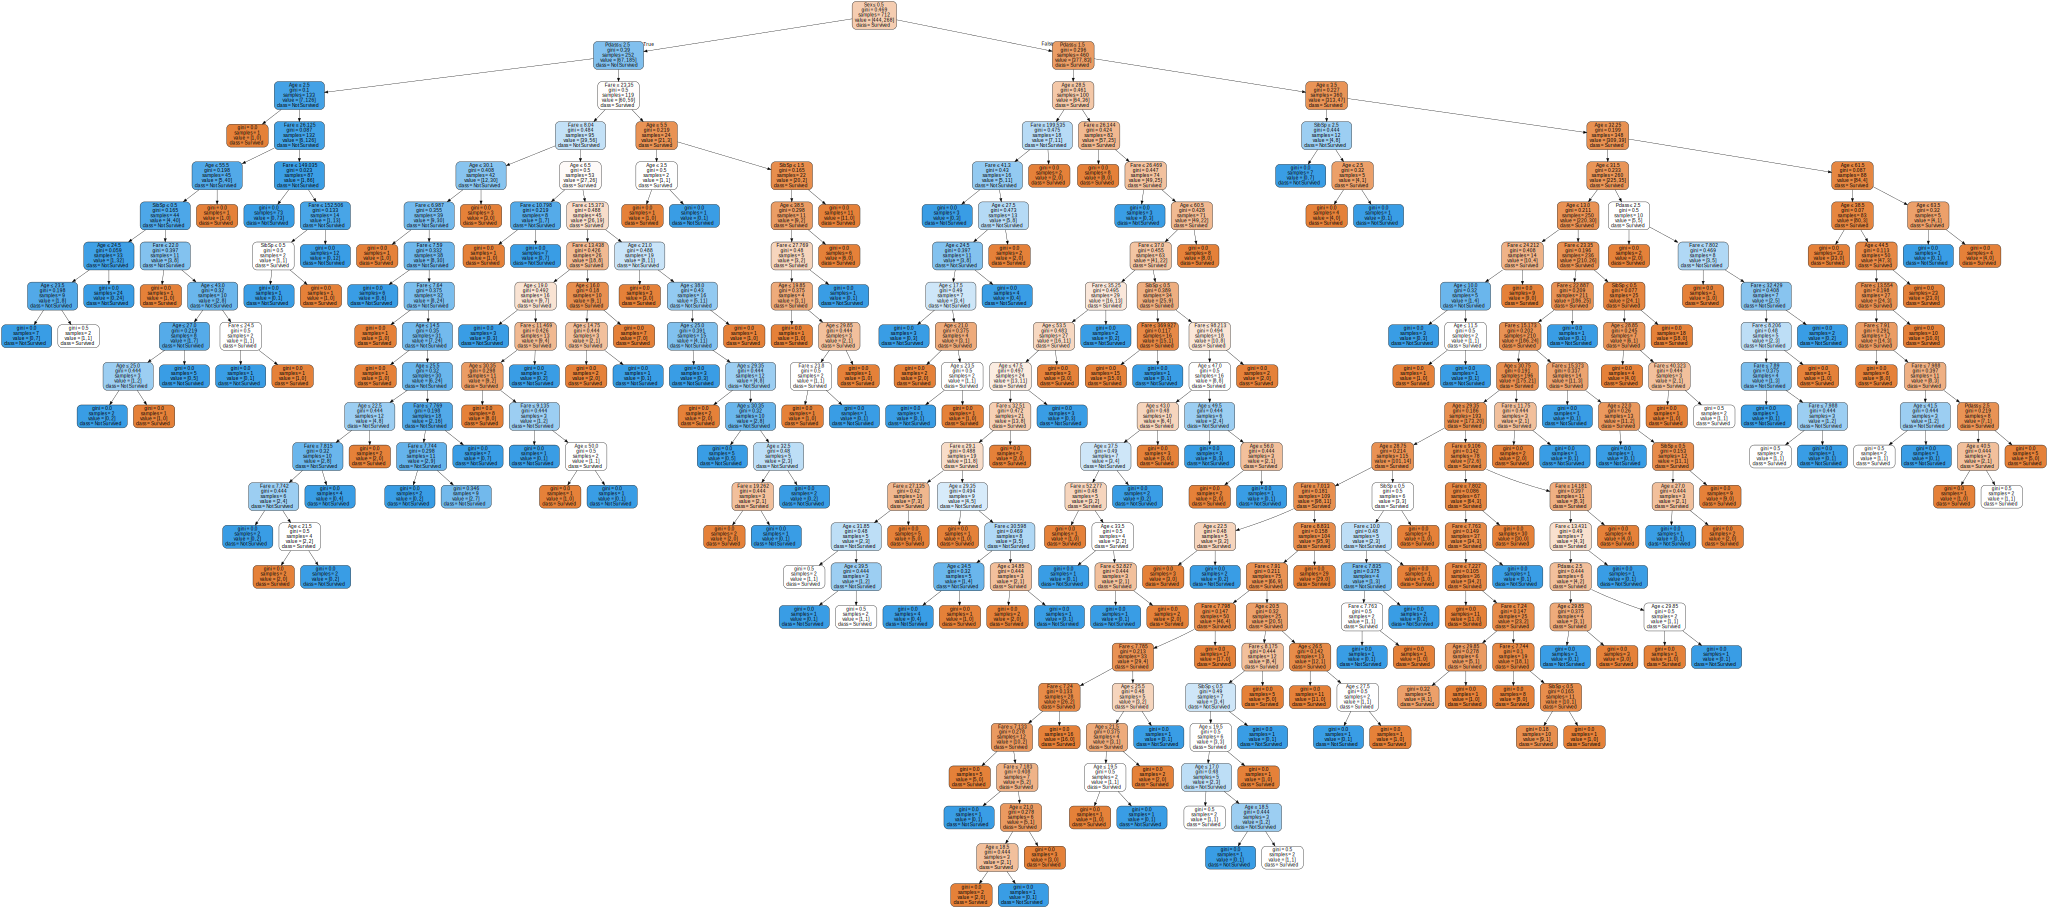

In [ ]:
dot_data = tree.export_graphviz(tr, out_file=None, 
                         feature_names=x_train.columns.values,  
                         class_names=['Survived','Not Survived'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [ ]:
dtree = tree.DecisionTreeClassifier(criterion = "gini" , splitter =' random' , max_leaf_nodes=10 , min_samples_leaf=10,max_depth=10)

In [ ]:
tr = tree.DecisionTreeClassifier()  
tr.fit(x_train, y_train)   #fitting our model
y_pred=tr.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7821229050279329


In [ ]:

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3)

In [ ]:
clf=RandomForestClassifier(n_estimators=12)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8022388059701493
